# NEURAL NETWORK DIGITS

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(y_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

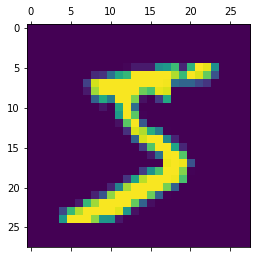

In [8]:
plt.matshow(X_train[0])

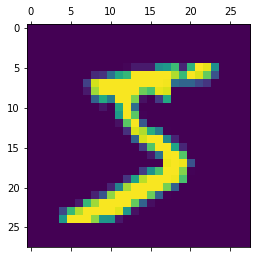

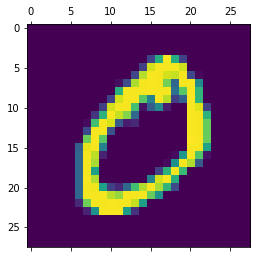

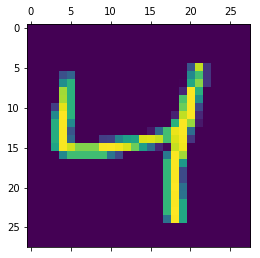

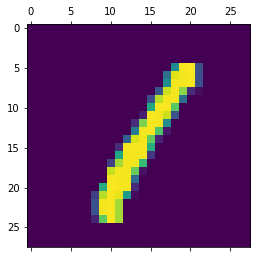

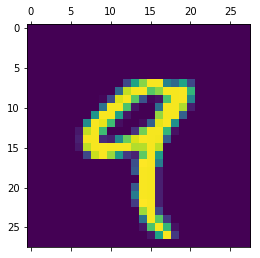

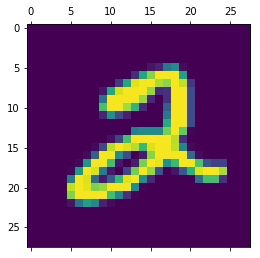

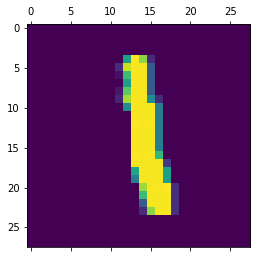

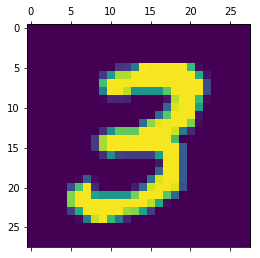

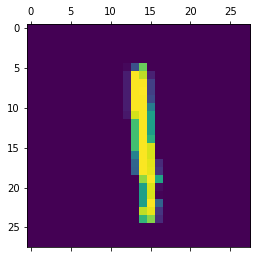

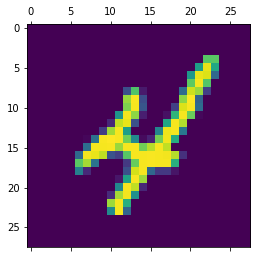

In [9]:
for i in range(10):
    plt.matshow(X_train[i])

In [10]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4723 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2840 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2735 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2675 - accuracy: 0.9257


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.9246


[0.27154168486595154, 0.9246000051498413]

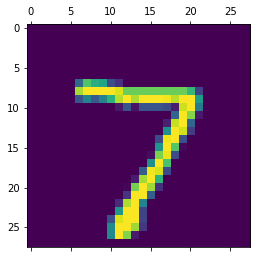

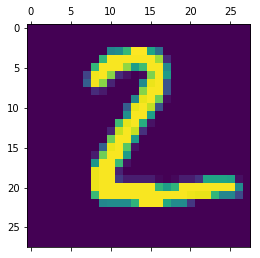

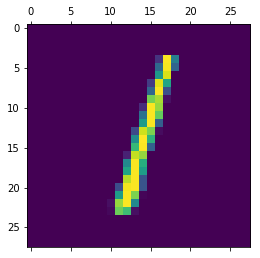

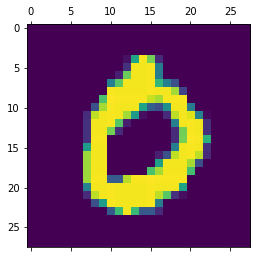

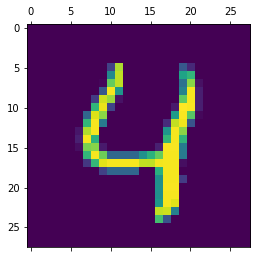

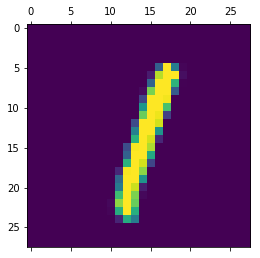

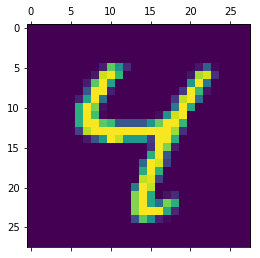

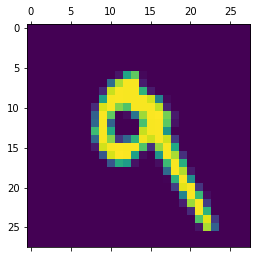

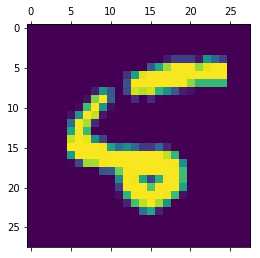

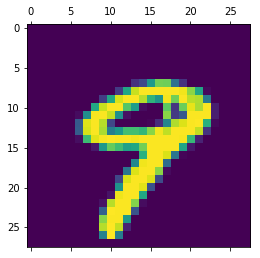

In [18]:
for i in range(10):
    plt.matshow(X_test[i])

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.33164036e-02, 3.38504208e-07, 5.73075712e-02, 9.63387728e-01,
       2.42242217e-03, 1.01533055e-01, 1.77170796e-06, 9.99775112e-01,
       9.20123458e-02, 6.95396364e-01], dtype=float32)

In [20]:
for i in range(10):
    print(np.argmax(y_predicted[i]))

7
2
1
0
4
1
4
9
6
9


In [21]:
for i in range(10):
    print(np.argmax(y_test[i]))

0
0
0
0
0
0
0
0
0
0


In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    3,    6,    2,    1,    0],
       [   0, 1115,    2,    2,    0,    1,    4,    2,    9,    0],
       [  10,   11,  910,   20,    6,    2,   13,   11,   44,    5],
       [   4,    0,   12,  926,    0,   20,    4,   10,   20,   14],
       [   1,    1,    2,    1,  903,    0,   13,    4,    9,   48],
       [  13,    3,    2,   38,   10,  754,   21,    7,   36,    8],
       [  13,    3,    4,    1,    7,    7,  919,    2,    2,    0],
       [   2,    8,   22,    6,    6,    0,    0,  935,    2,   47],
       [   7,   10,    5,   18,    9,   19,   10,   10,  871,   15],
       [  11,    7,    1,    8,   13,    4,    0,   11,    6,  948]])>

Text(69.0, 0.5, 'Truth')

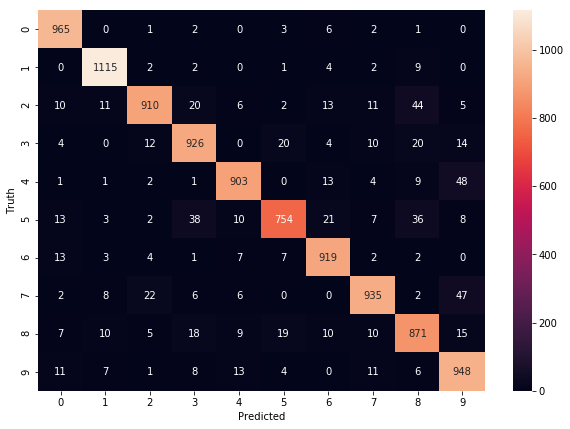

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# USING HIDDEN LAYERS

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2751 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1258 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0886 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0676 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0533 - accuracy: 0.9834


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9703


[0.0891478955745697, 0.970300018787384]

Text(69.0, 0.5, 'Truth')

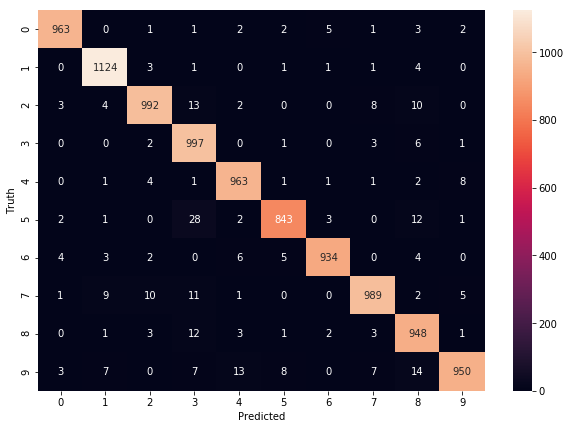

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using flatten layer

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2688 - accuracy: 0.9239
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1215 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0850 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0647 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0408 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0331 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.02

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9782


[0.07750056684017181, 0.9782000184059143]